Dataset
-------
For this example, we first create a synthetic dataset with the *make_moons* function

This function create two interleave half circles

In [2]:
from sklearn.datasets import make_moons
# Create Data set
n_samples = 250
x,y = make_moons(
    n_samples=n_samples, # Number of samples
    noise = 0.2, # Standard deviation of the noise added to the samples
    random_state = 1 # Seed for the random generaton
)

Train the model
---------------
We train an histogram-based Gradient Boosting Classification Tree on a training subset.

Since the *moons* samples are shuffled by default, there is no need to randomly choose the training data

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier
# Classifier
n_train = int(0.6 * n_samples)
clf = HistGradientBoostingClassifier()
clf.fit(x[:n_train],y[:n_train])


Accuracy: 0.94


Display the decision boundaries
-------------------------------
The background color in the plot indicates the class that would be assigned by the classifier to a sample located at this place. The lighter the color, the closer we get to change of decision. The *darkness* reflects thus the confidence of the classifier.

The plot also shows the the training points in solid color and testing points in semi-transparent.

As y ou can see the accuracy is 


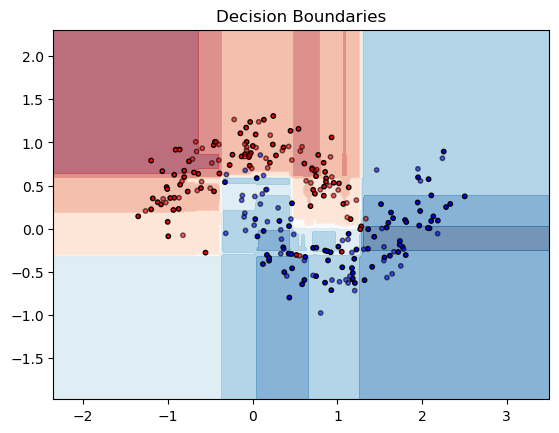

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

cmap= ListedColormap(["#FF0000", "#0000FF"])
# Plot the decision boundaries
DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    cmap = plt.cm.RdBu,
    alpha = 0.6,
    response_method="auto"
)

plt.scatter(
    x[:n_train,0],
    x[:n_train,1],
    s=10,
    c = y[:n_train],
    cmap=cmap,
    edgecolors="k",
)

plt.scatter(
    x[n_train:,0],
    x[n_train:,1],
    s=10,
    c = y[n_train:],
    cmap=cmap,
    edgecolors="k",
    alpha=0.6
)

score = clf.score(x[n_train:],y[n_train:])
plt.title("Decision Boundaries (Acc: {:.2f})".format(score))
# print('Accuracy: {:.2f}'.format(score))
plt.show()
